 # Religious Texts: NLP Series
 ## Sentiment Analysis of the Islamic religious text, Quran

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
QURAN = pd.read_excel('C:/Programming Practice Notebooks/religious-texts-NLP/data/quran.xlsx')
QURAN

,Unnamed: 0,Juz,JuzNameArabic,JuzNameEnglish,SurahNo,SurahNameArabic,SurahNameEnglish,SurahMeaning,Classification,AyahNo,...,MalayalamText,NorwegianText,PersianText,PortugueseText,RussianText,SwedishText,TamilText,TurkishText,UrduText,UzbekText
0,0,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,1,...,പരമകാരുണികനും കരുണാനിധിയുമായ അല്ലാഹുവിന്റെ നാമ...,"I Guds, den Barmhjertiges, den Nåderikes navn",به نام خداوند بخشنده بخشایشگر,"Em nome de Deus, o Clemente, o Misericordioso.","Во имя Аллаха, Милостивого, Милосердного!","I GUDs namn, Den Barmhärtigaste, Den Nådigaste.","அனைத்துப்புகழும்,அகிலங்கள் எல்லாவற்றையும் படைத...",Rahman ve Rahîm Allah´ın adıyla...,شروع الله کا نام لے کر جو بڑا مہربان نہایت رحم...,Меҳрибон ва раҳмли Аллоҳнинг номи билан бошлай...
1,1,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,2,...,സ്തുതി സര്‍വ്വലോക പരിപാലകനായ അല്ലാഹുവിന്നാകുന്നു.,"Lovet være Gud, all verdens Herre,",ستایش مخصوص خداوندی است که پروردگار جهانیان است.,"Louvado seja Deus, Senhor do Universo,","Хвала Аллаху, Господу миров,","Prisad vare GUD, Universums Herre.","(அவன்) அளவற்ற அருளாளன், நிகரற்ற அன்புடையோன்.","Hamt, âlemlerin Rabbi Allah´adır.",سب طرح کی تعریف خدا ہی کو (سزاوار) ہے جو تمام ...,"Барча мақтов, шукрлар оламларнинг тарбиячиси А..."
2,2,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,3,...,പരമകാരുണികനും കരുണാനിധിയും.,"Han, den Barmhjertige, den Nåderike,",(خداوندی که) بخشنده و بخشایشگر است (و رحمت عام...,"Clemente, o Misericordioso,","Милостивому, Милосердному,","Den Barmhärtigaste, Den Nådigaste.",(அவனே நியாயத்) தீர்ப்பு நாளின் அதிபதி(யும் ஆவா...,"Rahman´dır, Rahîm´dir O.",بڑا مہربان نہایت رحم والا,"У Роҳман ва Раҳийм... (Барчага-кофирга ҳам, мў..."
3,3,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,4,...,പ്രതിഫല ദിവസത്തിന്റെ ഉടമസ്ഥന്‍.,"Han, Herren over dommens dag.",(خداوندی که) مالک روز جزاست.,Soberano do Dia do Ju�zo.,Властелину Дня воздаяния!,Domedagens Härskare.,"(இறைவா!) உன்னையே நாங்கள் வணங்குகிறோம், உன்னிடம...",Din gününün Mâlik´i/ sultanıdır O...,انصاف کے دن کا حاکم,"У қиёмат кунининг подшоҳи, эгаси. (""Дин"" сўзи ..."
4,4,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,5,...,നിന്നെ മാത്രം ഞങ്ങള്‍ ആരാധിക്കുന്നു. നിന്നോട്‌...,"Deg tilber vi, vi søker hjelp hos Deg.",(پروردگارا!) تنها تو را می‌پرستیم؛ و تنها از ت...,S� a Ti adoramos e s� de Ti imploramos ajuda!,Тебе одному мы поклоняемся и Тебя одного молим...,Endast Dig dyrkar vi. Endast Dig ber vi om hjälp.,நீ எங்களை நேர் வழியில் நடத்துவாயாக!,Yalnız sana ibadet ederiz ve yalnız senden yar...,(اے پروردگار) ہم تیری ہی عبادت کرتے ہیں اور تج...,Фақат сенгагина ибодат қиламиз ва фақат сендан...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,6231,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,2,...,മനുഷ്യരുടെ രാജാവിനോട്‌.,"menneskenes Konge,",به مالک و حاکم مردم،,"O Rei dos humanos,",NaN,NaN,NaN,NaN,(یعنی) لوگوں کے حقیقی بادشاہ کی,Одамлар Подшоҳидан.
6232,6232,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,3,...,മനുഷ്യരുടെ ദൈവത്തോട്‌.,"menneskenes Gud,",به (خدا و) معبود مردم،,"O Deus dos humanos,",NaN,NaN,NaN,NaN,لوگوں کے معبود برحق کی,Одамлар Илоҳидан паноҳ сўрайман.
6233,6233,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,4,...,ദുര്‍ബോധനം നടത്തി പിന്‍മാറിക്കളയുന്നവരെക്കൊണ്ട...,"mot ondt fra den smygende frister,",از شرّ وسوسه‌گر پنهانکار،,"Contra o mal do sussurro do malfeitor,",NaN,NaN,NaN,NaN,(شیطان) وسوسہ انداز کی برائی سے جو (خدا کا نام...,"Беркиниб, кўриниб турувчи васвоснинг."
6234,6234,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,5,...,മനുഷ്യരുടെ ഹൃദയങ്ങളില്‍ ദുര്‍ബോധനം നടത്തുന്നവര്‍.,"som hvisker i menneskenes hjerter,",که در درون سینه انسانها وسوسه می‌کند،,"Que sussurra aos cora��es dos humanos,",NaN,NaN,NaN,NaN,جو لوگوں کے دلوں میں وسوسے ڈالتا ہے,Одамлар қалбига васваса соладиганнинг.


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from tqdm import tqdm

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
analyser = SentimentIntensityAnalyzer()

def predict_with_VaderSentiment(text):
    snt = analyser.polarity_scores(text)  #Calling the polarity analyzer
    if snt["compound"] >= 0:
        snt = "POSITIVE"
    else: snt="NEGATIVE"
    return snt


# Testing the operation of the model
text = "the most hated"
predict_with_VaderSentiment(text)

'NEGATIVE'

In [20]:
tqdm.pandas()
QURAN['Sentiment Analysis'] = QURAN['EnglishTranslation'].progress_apply(predict_with_VaderSentiment)
QURAN

100%|██████████| 6236/6236 [00:01<00:00, 4666.04it/s]


,Unnamed: 0,Juz,JuzNameArabic,JuzNameEnglish,SurahNo,SurahNameArabic,SurahNameEnglish,SurahMeaning,Classification,AyahNo,...,NorwegianText,PersianText,PortugueseText,RussianText,SwedishText,TamilText,TurkishText,UrduText,UzbekText,Sentiment Analysis
0,0,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,1,...,"I Guds, den Barmhjertiges, den Nåderikes navn",به نام خداوند بخشنده بخشایشگر,"Em nome de Deus, o Clemente, o Misericordioso.","Во имя Аллаха, Милостивого, Милосердного!","I GUDs namn, Den Barmhärtigaste, Den Nådigaste.","அனைத்துப்புகழும்,அகிலங்கள் எல்லாவற்றையும் படைத...",Rahman ve Rahîm Allah´ın adıyla...,شروع الله کا نام لے کر جو بڑا مہربان نہایت رحم...,Меҳрибон ва раҳмли Аллоҳнинг номи билан бошлай...,POSITIVE
1,1,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,2,...,"Lovet være Gud, all verdens Herre,",ستایش مخصوص خداوندی است که پروردگار جهانیان است.,"Louvado seja Deus, Senhor do Universo,","Хвала Аллаху, Господу миров,","Prisad vare GUD, Universums Herre.","(அவன்) அளவற்ற அருளாளன், நிகரற்ற அன்புடையோன்.","Hamt, âlemlerin Rabbi Allah´adır.",سب طرح کی تعریف خدا ہی کو (سزاوار) ہے جو تمام ...,"Барча мақтов, шукрлар оламларнинг тарбиячиси А...",POSITIVE
2,2,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,3,...,"Han, den Barmhjertige, den Nåderike,",(خداوندی که) بخشنده و بخشایشگر است (و رحمت عام...,"Clemente, o Misericordioso,","Милостивому, Милосердному,","Den Barmhärtigaste, Den Nådigaste.",(அவனே நியாயத்) தீர்ப்பு நாளின் அதிபதி(யும் ஆவா...,"Rahman´dır, Rahîm´dir O.",بڑا مہربان نہایت رحم والا,"У Роҳман ва Раҳийм... (Барчага-кофирга ҳам, мў...",POSITIVE
3,3,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,4,...,"Han, Herren over dommens dag.",(خداوندی که) مالک روز جزاست.,Soberano do Dia do Ju�zo.,Властелину Дня воздаяния!,Domedagens Härskare.,"(இறைவா!) உன்னையே நாங்கள் வணங்குகிறோம், உன்னிடம...",Din gününün Mâlik´i/ sultanıdır O...,انصاف کے دن کا حاکم,"У қиёмат кунининг подшоҳи, эгаси. (""Дин"" сўзи ...",POSITIVE
4,4,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,5,...,"Deg tilber vi, vi søker hjelp hos Deg.",(پروردگارا!) تنها تو را می‌پرستیم؛ و تنها از ت...,S� a Ti adoramos e s� de Ti imploramos ajuda!,Тебе одному мы поклоняемся и Тебя одного молим...,Endast Dig dyrkar vi. Endast Dig ber vi om hjälp.,நீ எங்களை நேர் வழியில் நடத்துவாயாக!,Yalnız sana ibadet ederiz ve yalnız senden yar...,(اے پروردگار) ہم تیری ہی عبادت کرتے ہیں اور تج...,Фақат сенгагина ибодат қиламиз ва фақат сендан...,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,6231,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,2,...,"menneskenes Konge,",به مالک و حاکم مردم،,"O Rei dos humanos,",NaN,NaN,NaN,NaN,(یعنی) لوگوں کے حقیقی بادشاہ کی,Одамлар Подшоҳидан.,POSITIVE
6232,6232,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,3,...,"menneskenes Gud,",به (خدا و) معبود مردم،,"O Deus dos humanos,",NaN,NaN,NaN,NaN,لوگوں کے معبود برحق کی,Одамлар Илоҳидан паноҳ сўрайман.,POSITIVE
6233,6233,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,4,...,"mot ondt fra den smygende frister,",از شرّ وسوسه‌گر پنهانکار،,"Contra o mal do sussurro do malfeitor,",NaN,NaN,NaN,NaN,(شیطان) وسوسہ انداز کی برائی سے جو (خدا کا نام...,"Беркиниб, кўриниб турувчи васвоснинг.",NEGATIVE
6234,6234,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,5,...,"som hvisker i menneskenes hjerter,",که در درون سینه انسانها وسوسه می‌کند،,"Que sussurra aos cora��es dos humanos,",NaN,NaN,NaN,NaN,جو لوگوں کے دلوں میں وسوسے ڈالتا ہے,Одамлар қалбига васваса соладиганнинг.,POSITIVE


In [21]:
QURAN.to_csv("C:/Programming Practice Notebooks/religious-texts-NLP/result/quran+english_sentiment_analysis.csv", encoding="utf-8-sig", index=False)

In [22]:
counts = QURAN['Sentiment Analysis'].value_counts()
counts

POSITIVE    4119
NEGATIVE    2117
Name: Sentiment Analysis, dtype: int64

In [23]:
df = QURAN[['EnglishTranslation','Sentiment Analysis']]

### Negative sentiment

In [26]:
neg = df.loc[df['Sentiment Analysis'] == 'NEGATIVE']
neg

,EnglishTranslation,Sentiment Analysis
12,"As to those who reject Faith, it is the same t...",NEGATIVE
15,Fain would they deceive Allah and those who be...,NEGATIVE
16,In their hearts is a disease; and Allah has in...,NEGATIVE
18,"Of a surety, they are the ones who make mischi...",NEGATIVE
19,"When it is said to them: ""Believe as the other...",NEGATIVE
...,...,...
6226,From the mischief of created things;,NEGATIVE
6227,From the mischief of Darkness as it overspreads;,NEGATIVE
6228,From the mischief of those who practise secret...,NEGATIVE
6229,And from the mischief of the envious one as he...,NEGATIVE


(-0.5, 399.5, 199.5, -0.5)

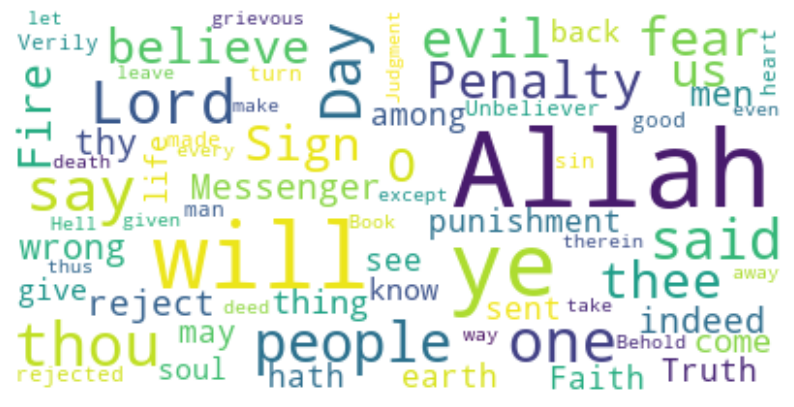

In [30]:
#Creating word cloud for the negative words

from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(collocations=False, max_font_size=55, max_words=69, background_color="white")
wc.generate(' '.join(neg.EnglishTranslation))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

### Positive sentiment

In [27]:
pos = df.loc[df['Sentiment Analysis'] == 'POSITIVE']
pos

,EnglishTranslation,Sentiment Analysis
0,"In the name of Allah, Most Gracious, Most Merc...",POSITIVE
1,"Praise be to Allah, the Cherisher and Sustaine...",POSITIVE
2,"Most Gracious, Most Merciful;",POSITIVE
3,Master of the Day of Judgment.,POSITIVE
4,"Thee do we worship, and Thine aid we seek.",POSITIVE
...,...,...
6230,Say: I seek refuge with the Lord and Cherisher...,POSITIVE
6231,"The King (or Ruler) of Mankind,",POSITIVE
6232,"The god (or judge) of Mankind,-",POSITIVE
6234,(The same) who whispers into the hearts of Man...,POSITIVE


(-0.5, 399.5, 199.5, -0.5)

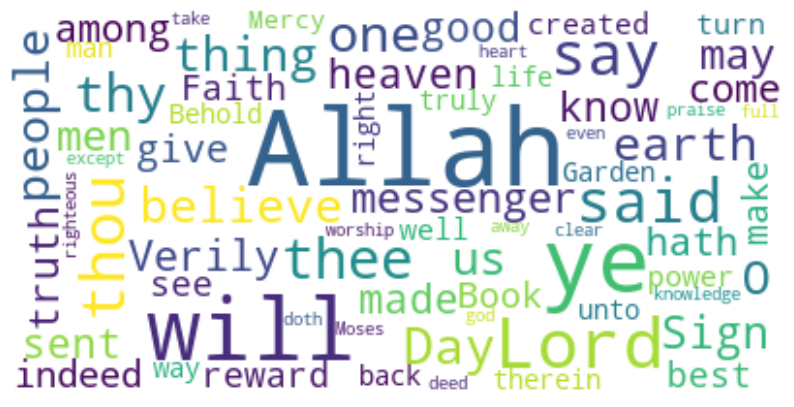

In [31]:
#Creating word cloud for the positive words

from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(collocations=False, max_font_size=55, max_words=69, background_color="white")
wc.generate(' '.join(pos.EnglishTranslation))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")